<a href="https://colab.research.google.com/github/hetkothari/Book-Recommendation-System-Capstone-4/blob/main/Personal_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
book   = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Het Kothari/Books.csv')
user   = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Het Kothari/Users.csv')
rating = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Het Kothari/Ratings.csv')

In [208]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [209]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [210]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [211]:
user.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [212]:
rating.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [213]:
book.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,037327016X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/044022330X.0...,http://images.amazon.com/images/P/068825294X.0...,http://images.amazon.com/images/P/044023722X.0...
freq,1,27,632,13903,7535,2,2,2


In [214]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [215]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [216]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [217]:
book = book.dropna(axis = 0)

In [218]:
rating = rating.dropna(axis = 0)

In [219]:
user.drop(['Age'],axis=1,inplace=True)

In [220]:
print (len(rating[rating.duplicated()]))
print (len(user[user.duplicated()]))
len(book[book.duplicated()])


0
0


0

In [221]:
book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [222]:
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(int)

In [223]:
book = book[book['Year-Of-Publication'] <= 2020 ]
book = book[book['Year-Of-Publication'] != 0 ]
book = book[book['Year-Of-Publication'] >= 1800 ]

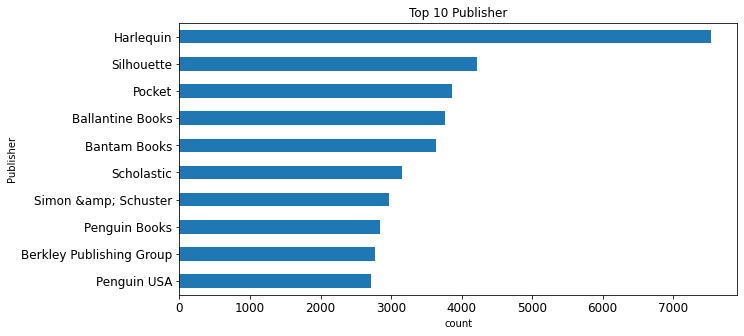

In [225]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = book['Publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

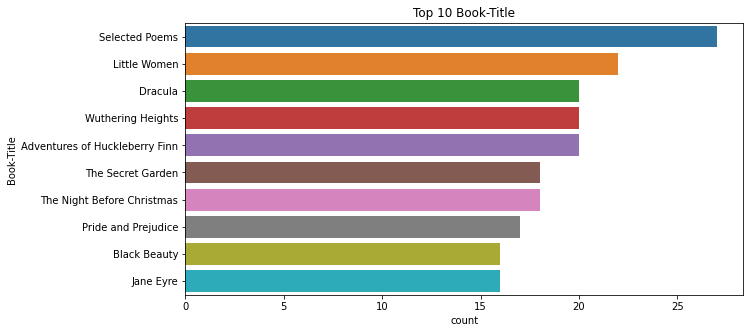

In [230]:
plt.figure(figsize=(10,5))
sns.countplot(y='Book-Title',data=book, order=pd.value_counts(book['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()

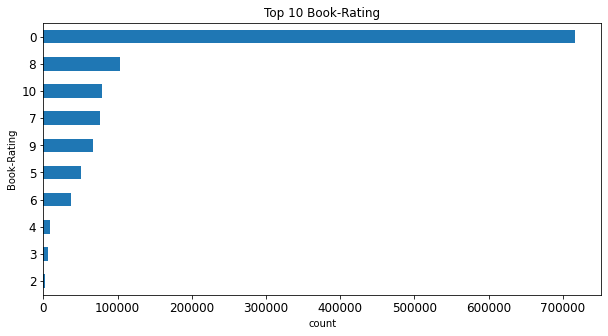

In [226]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = rating['Book-Rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Rating')
plt.show()

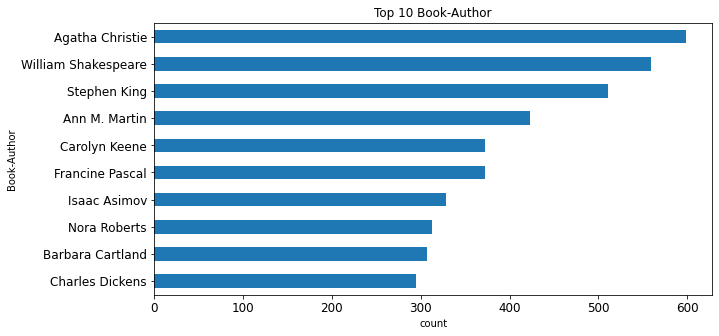

In [227]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = book['Book-Author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

In [ ]:
x = rating['User-ID'].value_counts() > 50
y = x[x].index  
print(y.shape)
combine = rating[rating['User-ID'].isin(y)]
combine

In [234]:
final = pd.merge(combine, book, on='ISBN')
final

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...
...,...,...,...,...,...,...,...,...,...,...
692635,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...
692636,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
692637,276688,0684838672,0,The LANGUAGE OF NAMES : WHAT WE CALL OURSELVES...,Justin Kaplan,1999,Touchstone,http://images.amazon.com/images/P/0684838672.0...,http://images.amazon.com/images/P/0684838672.0...,http://images.amazon.com/images/P/0684838672.0...
692638,276688,0788192043,0,The Hundred Secret Senses,Amy Tan,2000,DIANE Publishing Company,http://images.amazon.com/images/P/0788192043.0...,http://images.amazon.com/images/P/0788192043.0...,http://images.amazon.com/images/P/0788192043.0...


In [235]:
finalall = final.groupby('Book-Title')['Book-Rating'].count().reset_index()
final_rating = final.merge(finalall, on='Book-Title')
final_rating

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
...,...,...,...,...,...,...,...,...,...,...,...
692635,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...,1
692636,276688,0380790572,0,Jupiter Project,Gregory Benford,1998,Eos,http://images.amazon.com/images/P/0380790572.0...,http://images.amazon.com/images/P/0380790572.0...,http://images.amazon.com/images/P/0380790572.0...,1
692637,276688,0425150526,0,Death Crosses the Border,Janice Steinberg,1995,Berkley Publishing Group,http://images.amazon.com/images/P/0425150526.0...,http://images.amazon.com/images/P/0425150526.0...,http://images.amazon.com/images/P/0425150526.0...,1
692638,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...,1


In [237]:
final_rating = final_rating[final_rating['Book-Rating_y'] >= 30]
final_rating

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,http://images.amazon.com/images/P/0446364193.0...,195
...,...,...,...,...,...,...,...,...,...,...,...
496884,124363,0140434151,0,Emma (Penguin Classics),Jane Austen,1997,Penguin Books,http://images.amazon.com/images/P/0140434151.0...,http://images.amazon.com/images/P/0140434151.0...,http://images.amazon.com/images/P/0140434151.0...,31
496885,140013,0140434151,0,Emma (Penguin Classics),Jane Austen,1997,Penguin Books,http://images.amazon.com/images/P/0140434151.0...,http://images.amazon.com/images/P/0140434151.0...,http://images.amazon.com/images/P/0140434151.0...,31
496886,264657,0140434151,8,Emma (Penguin Classics),Jane Austen,1997,Penguin Books,http://images.amazon.com/images/P/0140434151.0...,http://images.amazon.com/images/P/0140434151.0...,http://images.amazon.com/images/P/0140434151.0...,31
496887,222488,0141439580,0,Emma (Penguin Classics),Jane Austen,2003,Penguin Books,http://images.amazon.com/images/P/0141439580.0...,http://images.amazon.com/images/P/0141439580.0...,http://images.amazon.com/images/P/0141439580.0...,31


In [238]:
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating_y")
book_pivot.fillna(0, inplace=True)